In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import animation 
from mpl_toolkits import mplot3d

ImportError: cannot import name 'animation' from 'matplotlib.animation' (C:\Users\Lewis\anaconda3\lib\site-packages\matplotlib\animation.py)

In [2]:
file = 'Documents/fortran/n_body.txt'
df = pd.read_csv(file, header= None, sep = ',', names = ['mass', 'x', 'y', 'z', 'Fx', 'Fy', 'Fz', 'ax', 'ay', 'az'] )

In [3]:
mass = df['mass']
x_positions = df['x']
y_positions = df['y']
z_positions = df['z']

N = len(np.unique(mass))
N_x_positions = [[] for _ in range(N)]
N_y_positions = [[] for _ in range(N)]
N_z_positions = [[] for _ in range(N)]

for i in range(len(x_positions)):
    mass_index = np.where(mass[i] == np.unique(mass))[0][0]
    N_x_positions[mass_index].append(x_positions[i])
    N_y_positions[mass_index].append(y_positions[i])
    N_z_positions[mass_index].append(z_positions[i])
    
print(N_y_positions)

[[137.775558, 138.526169, 140.796219, 144.662827, 150.300171, 158.034058, 168.481979, 182.979324, 205.540146, 274.513062, 378.528564, 476.733887, 574.809875, 672.732056, 770.598816, 868.442017, 966.273071, 1064.09705, 1161.9165, 1259.73291, 1357.547, 1455.3595, 1553.1709, 1650.98145, 1748.79114, 1846.60022, 1944.40881, 2042.21692, 2140.02466, 2237.83203, 2335.6394, 2433.44653, 2531.25342, 2629.0603, 2726.8667, 2824.6731, 2922.47949, 3020.28589, 3118.09229, 3215.89868, 3313.70508, 3411.51147, 3509.31787, 3607.12427, 3704.93066, 3802.73706, 3900.54346, 3998.34985, 4096.15625, 4193.9624, 4291.76855], [730.04657, 729.97229, 729.749329, 729.377441, 728.856262, 728.18512, 727.363159, 726.389221, 725.262024, 723.979919, 722.541138, 720.943481, 719.18457, 717.261719, 715.171875, 712.911743, 710.477478, 707.864807, 705.06897, 702.084717, 698.906128, 695.526672, 691.938904, 688.134705, 684.104797, 679.838806, 675.32489, 670.549744, 665.498169, 660.152832, 654.493591, 648.497314, 642.137329, 635.

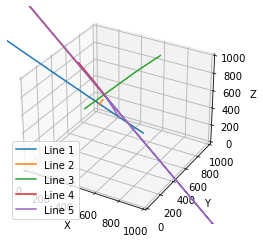

In [5]:
fig = plt.figure()
ax  = plt.axes(projection = "3d")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_xlim([0,1000])
ax.set_ylim([0,1000])
ax.set_zlim([0,1000])

for i in range(N):
    x   = N_x_positions[i]
    y   = N_y_positions[i]
    z   = N_z_positions[i]
    
    ax.plot3D(x,y,z, label=f'Line {i+1}')    
ax.legend()
plt.show()

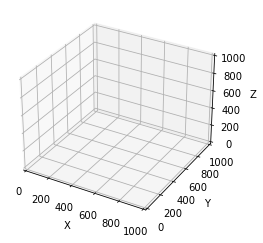

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_xlim([0, 1000])
ax.set_ylim([0, 1000])
ax.set_zlim([0, 1000])

lines = []

for i in range(N):
    line, = ax.plot([], [], [], label=f"Line {i+1}")
    lines.append(line)

def init():
    for line in lines:
        line.set_data([], [])
        line.set_3d_properties([])
    return lines

def animate(frame):
    for i, line in enumerate(lines):
        x = N_x_positions[i][:frame]
        y = N_y_positions[i][:frame]
        z = N_z_positions[i][:frame]
        line.set_data(x, y)
        line.set_3d_properties(z)
    return lines

ani = FuncAnimation(
    fig, animate, frames=len(df), init_func=init, blit=True, interval=100
)

plt.show()
#I've made some adjustments in how the 3D subplot is created (fig.add_subplot(111, projection='3d')) and how the lines are initialized. This should help avoid the issue of the plot appearing empty. Please give this version a try and let me know if it works for you.





